In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

target=pd.read_csv("./train_scores.csv")

In [2]:
target

,isFraud,iforest,lof,iforest+lof_u,iforest+lof_i,hdbscan,mahalanobis,iforest scores,lof scores,hdbscan scores,mahalanobis scores
0,0,1,1,0.0,0.0,0.0,0.0,-0.391002,-0.997672,0.015392,0.068867
1,0,1,1,0.0,0.0,0.0,0.0,-0.299100,-1.008481,0.013761,0.011401
2,0,1,1,0.0,0.0,0.0,0.0,-0.299100,-1.207288,0.003123,0.011401
3,0,-1,1,-1.0,0.0,0.0,0.0,-0.642361,-1.085168,0.007088,1.166482
4,0,1,1,0.0,0.0,0.0,0.0,-0.299100,-1.089259,0.091146,0.011401
...,...,...,...,...,...,...,...,...,...,...,...
590535,0,1,-1,-1.0,0.0,-1.0,0.0,-0.303563,-2.675082,0.807587,0.010451
590536,0,1,1,0.0,0.0,0.0,0.0,-0.299100,-1.407753,0.059276,0.011401
590537,0,1,1,0.0,0.0,0.0,0.0,-0.299100,-1.157963,0.023822,0.011401
590538,0,-1,1,-1.0,0.0,0.0,0.0,-0.699328,-1.103259,0.203412,4.066957


In [3]:
target.corr().loc['iforest scores':'mahalanobis scores','iforest scores':'mahalanobis scores']

,iforest scores,lof scores,hdbscan scores,mahalanobis scores
iforest scores,1.000000,0.021752,-0.063415,-0.112965
lof scores,0.021752,1.000000,-0.017610,-0.000004
hdbscan scores,-0.063415,-0.017610,1.000000,0.007447
mahalanobis scores,-0.112965,-0.000004,0.007447,1.000000


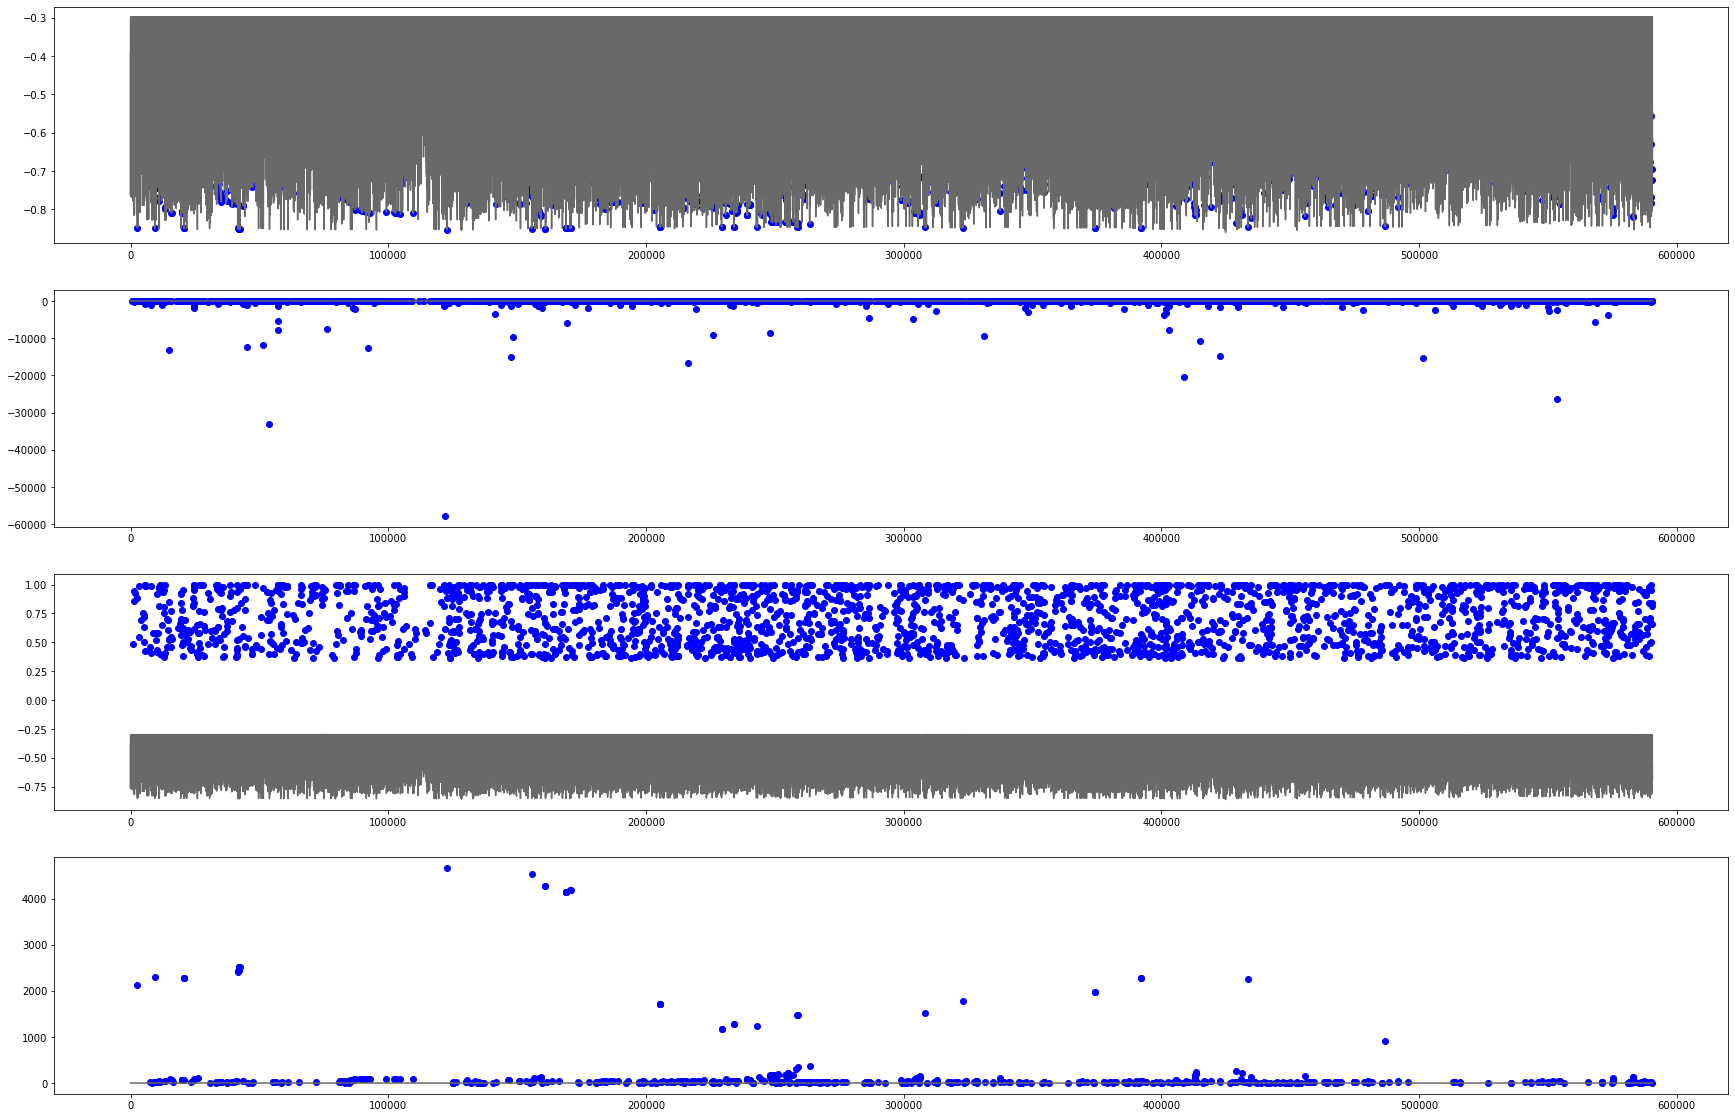

In [20]:
fig,axes=plt.subplots(4,figsize=(30,20))
methods=['iforest','lof','hdbscan','mahalanobis']
for i in range(4):
    axes[i].plot(target[['iforest scores']],color='dimgrey')
    axes[i].scatter(target.loc[(target['isFraud']==1) & (target[methods[i]]==-1)].index,
                    target.loc[(target['isFraud']==1) & (target[methods[i]]==-1),[methods[i]+' scores']],color='blue')

In [ ]:
## 아 맞다 서로 범주가 안 맞는구나ㅠㅠㅠㅠㅠ
## 와우 그럼 이 대규모의 스케일링을 해줘야 하는거야??
## 오바쌈바....
## 괜찮아 나에겐 라이브러리가 있으니까..아마....ㅜㅜ